In [1]:
# 讀取 CSV File
# Read the data into a data frame.
import pandas as pd
df = pd.read_csv('../2018-chienyeh_utf8.csv') 
df.head()

,銷貨倉,銷貨日期,銷貨次數,序號,銷貨時間,銷售金額,客戶代號,性別,藥品代號,藥品名稱,...,說明,等級,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金,發票
0,09,2018/1/1,10001,1001,10:23:00,2500,0919323538,女,009571,作預付2500元-全身芳療舒壓課程-09倉 ...,...,作新預收醫美課程(原861之1-11次,A,2500,100,20,2500.0,1,2500,0,
1,13,2018/1/1,10001,1001,12:52:52,2574,572,女,4710050921359,KB99無子大葡萄乾300G ...,...,有機食品,C,99,100,3,74.3,1,74,0,
2,03,2018/1/1,10001,1001,08:58:08,2824,C01,,4715168110572,永信后保寧1.5MG(事後)1錠入 ...,...,避孕藥,A,250,100,0,250.0,1,250,0,
3,05,2018/1/1,10001,1001,11:20:48,2849,E01,男,4716022950143,防疫天使嬰幼童口罩5入(綠.藍) ...,...,口眼罩貼,A,25,100,17,25.0,1,25,0,ˇ
4,18,2018/1/1,10001,1001,09:00:34,2948,0933131405,男,4901548160132,暖暖包24H 日本桐灰(小白兔)10入 ...,...,冰熱枕包,E,99,100,135,99.0,1,99,0,ˇ


In [2]:
def filter():
    global df
    
    ## delete column['類別代號'] = 998 cause it means refund of the product
    df = df[df['類別代號'] != '998\x1c']

filter()

In [4]:
import pandas as pd 
import numpy as np 

%matplotlib inline 
import matplotlib.pyplot as plt 

from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout
from keras.callbacks import EarlyStopping 
from keras.optimizers import Adam 

In [5]:
# Data 處理
solution = df

for i in solution.index:
    if solution.loc[i, '銷售量']<0:
        solution.loc[i, '銷售量'] = abs(solution.loc[i, '銷售量'])
        
solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index('銷貨日期')
solution = solution.groupby('藥品代號')

In [6]:
# Drug changing

##################################################### change this line will get differnent drug predict
#drug = solution.get_group('050000       \x1c')
#drug = solution.get_group('NC033541G0   \x1c') 
drug = solution.get_group('4713930104378\x1c') 
##################################################### 
drug.head()

,銷貨倉,銷貨次數,序號,銷貨時間,銷售金額,客戶代號,性別,藥品代號,藥品名稱,類別代號,說明,等級,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金,發票
銷貨日期,,,,,,,,,,,,,,,,,,,,
2018-01-03,13,10015,1001,20:11:25,590,0933803280,女,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,90,2,90.0,1,90,0,ˇ
2018-01-04,03,10005,1003,09:56:57,8317,C01,,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,100,6,100.0,1,100,0,
2018-01-04,03,10013,1002,13:40:52,20142,0936095666,女,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,90,5,90.0,1,90,0,
2018-01-05,03,10053,1001,20:44:38,95,0937031969,女,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,95,4,95.0,1,95,0,
2018-01-06,03,10018,1010,12:10:12,2299,C01,,4713930104378,杏輝喉舒樂口含錠2公絲20粒裝 ...,475,喉糖,A,100,100,3,100.0,1,100,0,


In [8]:
# 顯示藥品每天銷售量
#drug_allday will have 2018 all day for index and all column will set to zero
drug_allday = solution.get_group('050000       \x1c')
drug_allday = drug_allday.resample('D').sum()
for col in drug_allday.columns:
     drug_allday[col].values[:] = 0
        
drug_sum = drug.resample('D').sum()

for i in drug_sum.index:
    drug_allday.loc[i,'銷售量'] = drug_sum.loc[i,'銷售量']

drug_allday.head()

,銷貨次數,序號,銷售金額,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金
銷貨日期,,,,,,,,,,
2018-01-01,0,0,0,0,0,0,0.0,0,0,0
2018-01-02,0,0,0,0,0,0,0.0,0,0,0
2018-01-03,0,0,0,0,0,0,0.0,1,0,0
2018-01-04,0,0,0,0,0,0,0.0,2,0,0
2018-01-05,0,0,0,0,0,0,0.0,1,0,0


In [9]:
split_date1 = pd.Timestamp('2018-10-01') 
split_date2 = pd.Timestamp('2018-12-01') 
df_tmp = drug_allday['銷售量'] 
train = df_tmp.loc[:split_date1]
val = df_tmp.loc[split_date1:split_date2]
test = df_tmp.loc[split_date2:]

C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\back

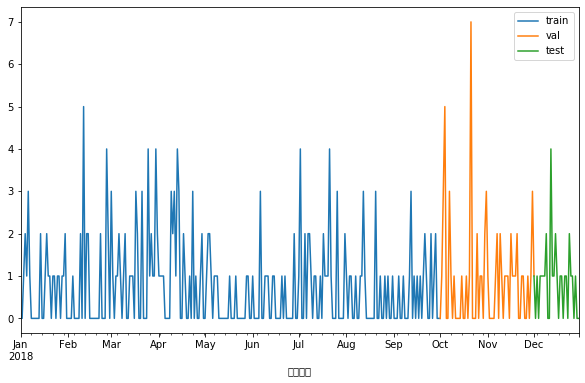

In [10]:
plt.figure(figsize=(10, 6)) 
ax = train.plot() 
ax = val.plot(ax=ax) 
test.plot(ax=ax) 
plt.legend(['train', 'val','test']);

In [11]:
train_tmp=train.values
val_tmp=val.values
test_tmp=test.values

In [12]:
def transform_dataset(dataset, look_back=1 , predict_day=1):
    # 前 N 天的銷售量
    dataX = [dataset[i:(i + look_back)]
             for i in range(len(dataset) - look_back - predict_day)]
    # 第 N 天的銷售量
    dataY = [dataset[(i + look_back):(i + look_back + predict_day)]
             for i in range(len(dataset) - look_back - predict_day)]
    return np.array(dataX), np.array(dataY)
look_back = 30
predict_day = 30
trainX, trainY = transform_dataset(train_tmp, look_back, predict_day)
valX,valY = transform_dataset(val_tmp, look_back, predict_day)
#testX, testY = transform_dataset(test_tmp, look_back, predict_day)

In [13]:
# DNN model
model = Sequential() 
model.add(Dense(units=64 , activation='sigmoid', input_dim = look_back)) 
model.add(Dense(16, activation='relu'))
model.add(Dense(units=predict_day)) 
model.compile(loss='mse', optimizer='adam') 
train_history = model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=1,shuffle=False, validation_data=(valX, valY))

Train on 214 samples, validate on 2 samples
Epoch 1/100
214/214 [==============================] - 0s 597us/step - loss: 1.5247 - val_loss: 0.9927
Epoch 2/100
214/214 [==============================] - 0s 140us/step - loss: 1.3181 - val_loss: 0.7742
Epoch 3/100
214/214 [==============================] - 0s 130us/step - loss: 1.1763 - val_loss: 0.6909
Epoch 4/100
214/214 [==============================] - 0s 135us/step - loss: 1.1136 - val_loss: 0.6848
Epoch 5/100
214/214 [==============================] - 0s 130us/step - loss: 1.0907 - val_loss: 0.6731
Epoch 6/100
214/214 [==============================] - 0s 135us/step - loss: 1.0805 - val_loss: 0.6732
Epoch 7/100
214/214 [==============================] - 0s 130us/step - loss: 1.0741 - val_loss: 0.6788
Epoch 8/100
214/214 [==============================] - 0s 130us/step - loss: 1.0683 - val_loss: 0.6769
Epoch 9/100
214/214 [==============================] - 0s 135us/step - loss: 1.0640 - val_loss: 0.6805
Epoch 10/100
214/214 [=======

214/214 [==============================] - 0s 135us/step - loss: 0.9309 - val_loss: 0.8392
Epoch 80/100
214/214 [==============================] - 0s 135us/step - loss: 0.9292 - val_loss: 0.8426
Epoch 81/100
214/214 [==============================] - 0s 130us/step - loss: 0.9276 - val_loss: 0.8370
Epoch 82/100
214/214 [==============================] - 0s 135us/step - loss: 0.9258 - val_loss: 0.8425
Epoch 83/100
214/214 [==============================] - 0s 135us/step - loss: 0.9250 - val_loss: 0.8329
Epoch 84/100
214/214 [==============================] - 0s 130us/step - loss: 0.9230 - val_loss: 0.8414
Epoch 85/100
214/214 [==============================] - 0s 135us/step - loss: 0.9218 - val_loss: 0.8377
Epoch 86/100
214/214 [==============================] - 0s 130us/step - loss: 0.9198 - val_loss: 0.8427
Epoch 87/100
214/214 [==============================] - 0s 130us/step - loss: 0.9188 - val_loss: 0.8201
Epoch 88/100
214/214 [==============================] - 0s 130us/step - loss:

In [14]:
model.save('stock_DNN_model.h5')

In [15]:
test1 = model.evaluate(valX, valY, batch_size=5)
print("Test Result: ", test1)

2/2 [==============================] - 0s 499us/step
Test Result:  0.8123345971107483


In [17]:
#predict
from keras.models import load_model
model = load_model('./stock_DNN_model.h5')

split_date3 = pd.Timestamp('2018-11-01') 
split_date4 = pd.Timestamp('2018-11-30') 
predicted = df_tmp.loc[split_date3:split_date4]
predicted = predicted.values


predict = model.predict(np.array([predicted]))
print(predict[0])

[0.8005302  1.5369648  1.2326086  0.71477103 0.75993925 0.5866142
 0.5431782  0.84815294 0.7707745  0.8843342  0.67966497 1.0142581
 1.6350187  1.0417981  0.85819    0.9056107  1.2377597  1.183507
 0.52244973 0.9081466  1.0447735  0.6331064  1.0040624  0.74109924
 0.7555335  0.6672734  0.6628033  0.6075381  1.1227766  0.6747494 ]


<Figure size 720x432 with 0 Axes>

C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\back

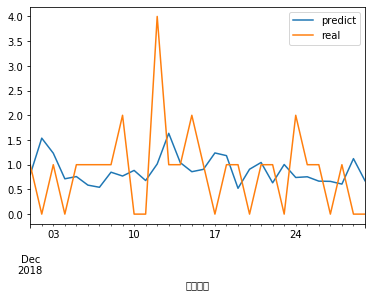

In [18]:
# Predict visualize
res = pd.DataFrame(columns = ['銷貨日期','sales'])
for i in range(0,30):
    res.loc[i,'sales'] = predict[0][i]
    res.loc[i,'銷貨日期'] = test.index[i]

res= res.set_index('銷貨日期')

plt.figure(figsize=(10, 6)) 
ax = res.plot() 
ax = test.plot(ax=ax)
plt.legend(['predict','real']);